In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from matplotlib import cm
import glob
import sys
import json
import codecs

%matplotlib inline
sys.path.append('../')

from models.Problem_Class import OptimalControl, OptimalControlConvex
from opt_algos.projected_gradient_descent import projected_gradient_descent, projector
from opt_algos.projected_accelerated_gradient_descent import accelerated_gradient_descent
from opt_algos.ADAGRAD import ADAGRAD_plus
from opt_algos.ADAAGD import ADAAGD_plus

# Objective functions plots

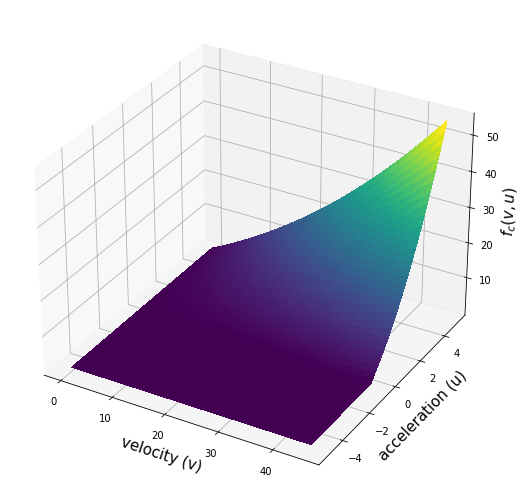

In [2]:
model_full = OptimalControl([0], 0, 0, 0, 0)
v = np.linspace(0, 45, 500)
a = np.linspace(-5, 5, 250)
X, Y = np.meshgrid(v, a)
fc = model_full.fuel_model(X, Y)
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.grid()

ax.plot_surface(X, Y, fc, cmap='viridis', edgecolor='none', linewidth=0, antialiased=False)
ax.set_zlabel(r'$f_c(v, u)$', fontsize=15)
ax.set_xlabel('velocity (v)', fontsize=15)
ax.set_ylabel('acceleration (u)', fontsize=15)
plt.savefig("results/obj_1.png", dpi = 450)

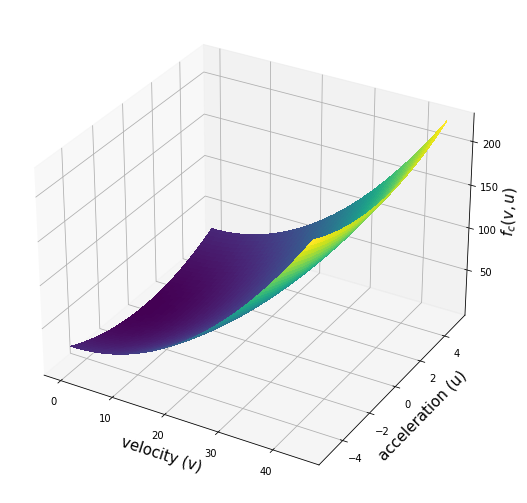

In [3]:
model_full = OptimalControl([0], 0, 0, 0, 0)
v = np.linspace(0, 45, 500)
a = np.linspace(-5, 5, 250)
X, Y = np.meshgrid(v, a)
fc = 1e-1 * X**2 + Y**2
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.grid()

ax.plot_surface(X, Y, fc, cmap='viridis', edgecolor='none', linewidth=0, antialiased=False)
ax.set_zlabel(r'$f_c(v, u)$', fontsize=15)
ax.set_xlabel('velocity (v)', fontsize=15)
ax.set_ylabel('acceleration (u)', fontsize=15)
plt.savefig("results/obj_2.png", dpi = 450)

# Import data

In [4]:
files = glob.glob("traffic_data/*.csv")
data = {}
for i, file in enumerate(files): 
    temp = pd.read_csv(file)
    temp = temp[2000:3500]
    data[i] = {}
    v = np.array(temp.Velocity)*(1000/3600)
    data[i]["time"] = np.array(temp.Time) - min(temp.Time)
    data[i]["vl"] = np.array(temp.Velocity)*(1000/3600)
    data[i]["xl"] = np.array(temp.DistanceGPS) - min(np.array(temp.DistanceGPS)) + 2 * v[0]
    s = np.diff(v)
    data[i]["u0"] = np.append(s, s[-1])/0.1
    data[i]["y0"] = [0, v[0]]

# velocity = 30 * np.ones(time.shape)
# position = 20 + np.multiply(time, velocity) 


In [5]:
files

['traffic_data/2021-03-24-12-39-15_2T3MWRFVXLW056972_masterArray_0_6438.csv',
 'traffic_data/2021-04-15-21-32-46_2T3MWRFVXLW056972_masterArray_1_3685.csv',
 'traffic_data/2021-04-22-12-47-13_2T3MWRFVXLW056972_masterArray_0_7050.csv']

# Trajectories plots

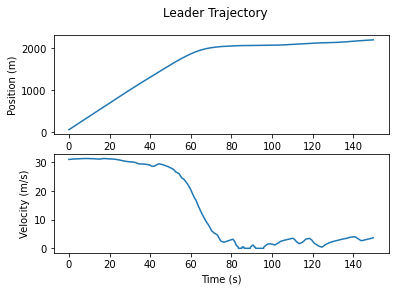

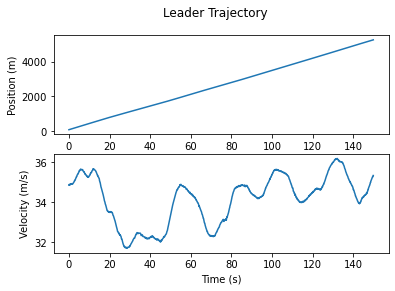

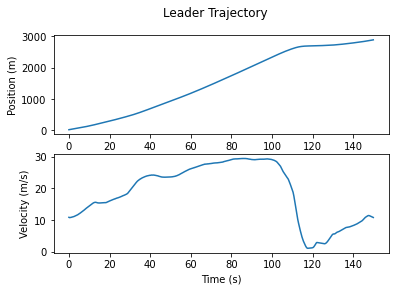

In [41]:
for i in data.keys():
    fig, axs = plt.subplots(2)
    fig.suptitle('Leader Trajectory')
    axs[0].plot(data[i]["time"], data[i]["xl"])
    axs[0].set_xlabel("Time (s)")
    axs[0].set_ylabel("Position (m)")
    axs[1].plot(data[i]["time"], data[i]["vl"])
    axs[1].set_xlabel("Time (s)")
    axs[1].set_ylabel("Velocity (m/s)")
    plt.savefig("results/traj{}.png".format(i), dpi = 450)

# Run algorithms

In [6]:
## General params
max_iterations= 1e3
epsilon=1e-6

Algorithm 3: ADAGRAD+

10
Objective value =  6619.488995400952
Objective value =  6251.0732237247485
Objective value =  6265.3464866768445
Objective value =  6240.118795433426
Objective value =  6218.388481124452
Objective value =  6201.763374329509
Objective value =  6203.068935649522
Objective value =  6191.207685368967
Objective value =  6192.9981270748285
Objective value =  6162.288163213881
Objective value =  6143.027432061087
Objective value =  6122.579901705227
Objective value =  6118.357398251343
Objective value =  6118.824492844294
Objective value =  6118.351736129119
Objective value =  6123.935879289983
Objective value =  6118.615421192024
Objective value =  6119.548608250004
Objective value =  6118.976649498287
Objective value =  6120.696767561645
Objective value =  6121.057950212892
Objective value =  6121.7541653654225
Objective value =  6120.4098898466245
Objective value =  6121.685408600724
Objective value =  6119.935497699608
Objective value =  6121.022886264058
Objective value =  6119.409051

Objective value =  6125.710027489284
Objective value =  6125.742941379808
Objective value =  6125.67976805944
Objective value =  6125.660923611858
Objective value =  6125.63688178893
Objective value =  6125.6484947467425
Objective value =  6125.6891065585205
Objective value =  6125.688319797401
Objective value =  6125.681708365871
Objective value =  6125.680576143081
Objective value =  6125.6842225371165
Objective value =  6125.681304707017
Objective value =  6125.673377146236
Objective value =  6125.658409893224
Objective value =  6125.641127754298
Objective value =  6125.626789919143
Objective value =  6125.613013076352
Objective value =  6125.599732090771
Objective value =  6125.586930711764
Objective value =  6125.57459381788
Objective value =  6125.562706609884
Objective value =  6125.550982043379
Objective value =  6125.539111657878
Objective value =  6125.527651928247
Objective value =  6125.516635121338
Objective value =  6125.504774843862
Objective value =  6125.493049242257
O

Objective value =  6125.663741689501
Objective value =  6125.666605648728
Objective value =  6125.66945394437
Objective value =  6125.672289947881
Objective value =  6125.675111711944
Objective value =  6125.677917467826
Objective value =  6125.680707128135
Objective value =  6125.683480610397
Objective value =  6125.686237837094
Objective value =  6125.6889787353475
Objective value =  6125.691703236795
Objective value =  6125.694411277612
Objective value =  6125.697102798501
Objective value =  6125.699777744157
Objective value =  6125.702436063426
Objective value =  6125.705077709708
Objective value =  6125.707702639789
Objective value =  6125.710310814572
Objective value =  6125.712902198654
Objective value =  6125.715476760364
Objective value =  6125.718034471578
Objective value =  6125.720575307853
Objective value =  6125.723099247508
Objective value =  6125.725606273027
Objective value =  6125.728096369699
Objective value =  6125.730569418418
Objective value =  6125.733025199372
O

Objective value =  6125.954434281653
Objective value =  6125.95467567763
Objective value =  6125.954912160376
Objective value =  6125.955143781083
Objective value =  6125.9553705910575
Objective value =  6125.955592640456
Objective value =  6125.955809979333
Objective value =  6125.956022657355
Objective value =  6125.956230723822
Objective value =  6125.956434227754
Objective value =  6125.956633217334
Objective value =  6125.956827740793
Objective value =  6125.957017845655
Objective value =  6125.9572035794345
Objective value =  6125.95738498859
Objective value =  6125.957562119926
Objective value =  6125.9577350196405
Objective value =  6125.957903733404
Objective value =  6125.95806830628
Objective value =  6125.958228783388
Objective value =  6125.958385209602
Objective value =  6125.9585376287205
Objective value =  6125.958686084928
Objective value =  6125.958830621573
Objective value =  6125.958971281793
Objective value =  6125.959108108542
Objective value =  6125.959241058483


Objective value =  6125.946694465737
Objective value =  6125.9465580503065
Objective value =  6125.946421563584
Objective value =  6125.946285012501
Objective value =  6125.946148404197
Objective value =  6125.946011745382
Objective value =  6125.94587504289
Objective value =  6125.945738303331
Objective value =  6125.94560153351
Objective value =  6125.9454647401535
Objective value =  6125.945327929254
Objective value =  6125.945191107238
Objective value =  6125.94505428041
Objective value =  6125.944917454856
Objective value =  6125.94478063636
Objective value =  6125.94464383109
Objective value =  6125.944507044626
Objective value =  6125.944370282974
Objective value =  6125.944233551633
Objective value =  6125.944096856346
Objective value =  6125.943960202564
Objective value =  6125.9438235955395
Objective value =  6125.943687040895
Objective value =  6125.943550543833
Objective value =  6125.943414109571
Objective value =  6125.943277743092
Objective value =  6125.943141449777
Obj

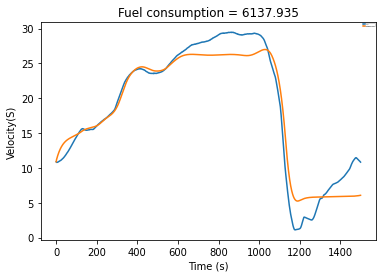

In [8]:
## Convex Objective 
i = 2
exp_name = "convex_ADAGRAD_{}".format(i)
model = OptimalControlConvex(data[i]["time"], data[i]["y0"][0], data[i]["y0"][1], data[i]["xl"], data[i]["vl"])
A, b = model.constraints()
sol_3_2_con = ADAGRAD_plus(model, max_iterations=max_iterations, epsilon=epsilon, x0=data[i]["u0"], A = A.T, b = b, R = 10)


out_file = open("results/{}.json".format(exp_name), "w") 
json.dump(sol_3_2_con, out_file, indent = 6) 
out_file.close() 

plt.plot(data[i]["vl"])
X, V = model.system_solve(sol_3_2_con["solution"])
fc = model.F(np.array(sol_3_2_con["solution"]))
plt.plot(V)
plt.legend(["Leader", "Optimal follower"], fontsize = 1)
plt.xlabel("Time (s)")
plt.ylabel("Velocity(S)")
plt.title("Fuel consumption = {}".format(np.round(fc, 3)))
plt.savefig("results/{}.png".format(exp_name), dpi = 300)

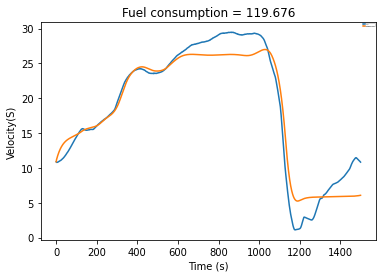

In [10]:
model_org = OptimalControl(data[i]["time"], data[i]["y0"][0], data[i]["y0"][1], data[i]["xl"], data[i]["vl"])
plt.plot(data[i]["vl"])
X, V = model.system_solve(sol_3_2_con["solution"])
fc = model_org.F(np.array(sol_3_2_con["solution"]))
plt.plot(V)
plt.legend(["Leader", "Optimal follower"], fontsize = 1)
plt.xlabel("Time (s)")
plt.ylabel("Velocity(S)")
plt.title("Fuel consumption = {}".format(np.round(fc, 3)))
plt.savefig("results/{}.png".format(exp_name), dpi = 300)

10
Objective value =  17613.577737415104
Objective value =  17883.461705971822
Objective value =  18351.215142041296
Objective value =  17808.23859186754
Objective value =  17776.627426462455
Objective value =  17797.058947377078
Objective value =  17683.337551922268
Objective value =  17743.36499298865
Objective value =  17688.68127734686
Objective value =  17715.223656255577
Objective value =  17641.771524012358
Objective value =  17752.85365468043
Objective value =  17647.24573422503
Objective value =  17748.15423075375
Objective value =  17643.14868866106
Objective value =  17714.285595448328
Objective value =  17632.553834216462
Objective value =  17670.03162729714
Objective value =  17613.181842208574
Objective value =  17657.22049817011
Objective value =  17612.420616905907
Objective value =  17648.02773622562
Objective value =  17612.123727122496
Objective value =  17651.044963117012
Objective value =  17611.830082788572
Objective value =  17649.487514847024
Objective value =  

Objective value =  17581.550361150814
Objective value =  17581.540774395868
Objective value =  17581.53250558526
Objective value =  17581.525473191858
Objective value =  17581.519569580847
Objective value =  17581.514673578193
Objective value =  17581.510646660874
Objective value =  17581.507357643648
Objective value =  17581.504680889644
Objective value =  17581.5025110204
Objective value =  17581.500752893153
Objective value =  17581.499331716914
Objective value =  17581.49819182661
Objective value =  17581.49729236008
Objective value =  17581.49660659716
Objective value =  17581.496092481062
Objective value =  17581.495724655822
Objective value =  17581.49548728686
Objective value =  17581.495364578743
Objective value =  17581.49534545542
Objective value =  17581.49542337746
Objective value =  17581.49559015772
Objective value =  17581.49583984668
Objective value =  17581.496166044668
Objective value =  17581.496566299917
Objective value =  17581.497033184543
Objective value =  1758

Objective value =  17581.679666009255
Objective value =  17581.680319098778
Objective value =  17581.680969060377
Objective value =  17581.681615907753
Objective value =  17581.68225965453
Objective value =  17581.68290031579
Objective value =  17581.68353790804
Objective value =  17581.68417244663
Objective value =  17581.684803947646
Objective value =  17581.68543242644
Objective value =  17581.686057899275
Objective value =  17581.6866803823
Objective value =  17581.68729989078
Objective value =  17581.68791642151
Objective value =  17581.6885299597
Objective value =  17581.689140507246
Objective value =  17581.68974807846
Objective value =  17581.690352691137
Objective value =  17581.690954364396
Objective value =  17581.691553109264
Objective value =  17581.692148945593
Objective value =  17581.692741896484
Objective value =  17581.693331983333
Objective value =  17581.693919225938
Objective value =  17581.694503643135
Objective value =  17581.695085253978
Objective value =  17581

Objective value =  17581.75726332738
Objective value =  17581.757446021085
Objective value =  17581.757627942934
Objective value =  17581.757809098275
Objective value =  17581.757989492016
Objective value =  17581.758169129545
Objective value =  17581.758348015992
Objective value =  17581.758526156398
Objective value =  17581.75870355551
Objective value =  17581.758880335805
Objective value =  17581.75905675
Objective value =  17581.759232982527
Objective value =  17581.759409141137
Objective value =  17581.759585283966
Objective value =  17581.759761439036
Objective value =  17581.759937614344
Objective value =  17581.76011380547
Objective value =  17581.760290002403
Objective value =  17581.760466190168
Objective value =  17581.76064235314
Objective value =  17581.76081847443
Objective value =  17581.76099453592
Objective value =  17581.76117052122
Objective value =  17581.76134641563
Objective value =  17581.761522202865
Objective value =  17581.76169786953
Objective value =  17581.

Objective value =  17581.78933223914
Objective value =  17581.789441072317
Objective value =  17581.789549595953
Objective value =  17581.7896578114
Objective value =  17581.789765719037
Objective value =  17581.789873320045
Objective value =  17581.78998061541
Objective value =  17581.79008760651
Objective value =  17581.790194293822
Objective value =  17581.790300678294
Objective value =  17581.790406761047
Objective value =  17581.790512543666
Objective value =  17581.79061802575
Objective value =  17581.790723209062
Objective value =  17581.79082809486
Objective value =  17581.790932683347
Objective value =  17581.791036976392
Objective value =  17581.791140974085
Objective value =  17581.791244677486
Objective value =  17581.791348088234
Objective value =  17581.791451206456
Objective value =  17581.79155403373
Objective value =  17581.79165657057
Objective value =  17581.791758818228
Objective value =  17581.79186077739
Objective value =  17581.791962448966
Objective value =  175

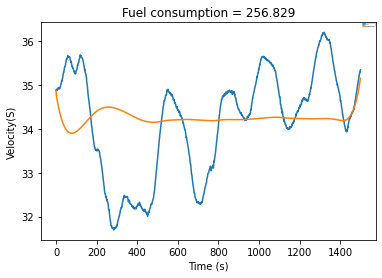

In [8]:
## Convex Objective 
i = 1
exp_name = "convex_ADAGRAD_{}".format(i)
model = OptimalControlConvex(data[i]["time"], data[i]["y0"][0], data[i]["y0"][1], data[i]["xl"], data[i]["vl"])
A, b = model.constraints()
sol_3_1_con = ADAGRAD_plus(model, max_iterations=max_iterations, epsilon=epsilon, x0=data[i]["u0"], A = A.T, b = b, R = 10)


out_file = open("results/{}.json".format(exp_name), "w") 
json.dump(sol_3_1_con, out_file, indent = 6) 
out_file.close() 

model_org = OptimalControl(data[i]["time"], data[i]["y0"][0], data[i]["y0"][1], data[i]["xl"], data[i]["vl"])
plt.plot(data[i]["vl"])
X, V = model.system_solve(sol_3_1_con["solution"])
fc = model_org.F(np.array(sol_3_1_con["solution"]))
plt.plot(V)
plt.legend(["Leader", "Optimal follower"], fontsize = 1)
plt.xlabel("Time (s)")
plt.ylabel("Velocity(S)")
plt.title("Fuel consumption = {}".format(np.round(fc, 3)))
plt.savefig("results/{}.png".format(exp_name), dpi = 300)


Algorithm 4: ADAAGD+

Objective value =  6251.0732237247485
time 7.803329229354858
Objective value =  6205.352626740656
time 8.520802021026611
Objective value =  6237.583155676991
time 9.26774287223816
Objective value =  6137.568547266429
time 15.647372007369995
Objective value =  6134.445078221453
time 16.950544834136963
Objective value =  6124.927398809619
time 17.704796075820923
Objective value =  6123.987895679919
time 20.407229900360107
Objective value =  6121.062879894842
time 22.674072980880737
Objective value =  6120.45372942156
time 23.2182776927948
Objective value =  6120.139513012091
time 24.445966958999634
Objective value =  6119.621922445271
time 25.406659841537476
Objective value =  6119.7243929139395
time 27.715038776397705
Objective value =  6119.404040589018
time 30.57103419303894
Objective value =  6121.310773814796
time 31.17913818359375
Objective value =  6119.754550049982
time 32.41545295715332
Objective value =  6119.359011590229
time 34.79945516586304
Objective value =  6120.419688708

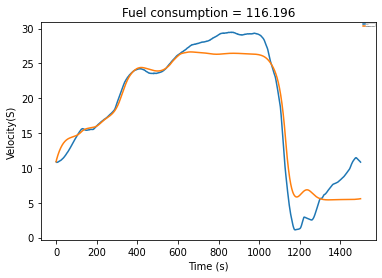

In [8]:
## Convex Objective 
i = 2
exp_name = "convex_ADAAGD_{}".format(i)
model = OptimalControlConvex(data[i]["time"], data[i]["y0"][0], data[i]["y0"][1], data[i]["xl"], data[i]["vl"])
A, b = model.constraints()
sol_4_2_con = ADAAGD_plus(model, max_iterations=100, epsilon=epsilon, x0=data[i]["u0"], A = A.T, b = b, R = 10)


out_file = open("results/{}.json".format(exp_name), "w") 
json.dump(sol_4_2_con, out_file, indent = 6) 
out_file.close() 

model_org = OptimalControl(data[i]["time"], data[i]["y0"][0], data[i]["y0"][1], data[i]["xl"], data[i]["vl"])

plt.plot(data[i]["vl"])
X, V = model.system_solve(sol_4_2_con["solution"])
fc = model_org.F(np.array(sol_4_2_con["solution"]))
plt.plot(V)
plt.legend(["Leader", "Optimal follower"], fontsize = 1)
plt.xlabel("Time (s)")
plt.ylabel("Velocity(S)")
plt.title("Fuel consumption = {}".format(np.round(fc, 3)))
plt.savefig("results/{}.png".format(exp_name), dpi = 300)

Objective value =  17883.461705971822
time 1.7539751529693604
Objective value =  17920.54749524925
time 5.328789949417114
Objective value =  17700.764582241394
time 10.123155117034912
Objective value =  17643.32338275794
time 3.8549671173095703
Objective value =  17596.74459071786
time 3.5591187477111816
Objective value =  17611.229494340634
time 3.037674903869629
Objective value =  17589.255478219868
time 3.335339069366455
Objective value =  17591.849200200188
time 3.236391067504883
Objective value =  17586.271096846926
time 3.0835888385772705
Objective value =  17586.177100677935
time 2.938390016555786
Objective value =  17583.692870826555
time 2.969536066055298
Objective value =  17584.5978947913
time 2.8165011405944824
Objective value =  17590.524520168612
time 2.8589439392089844
Objective value =  17584.004530981223
time 2.751957893371582
Objective value =  17583.245405197296
time 2.792910099029541
Objective value =  17583.317057225242
time 2.7373287677764893
Objective value =  17

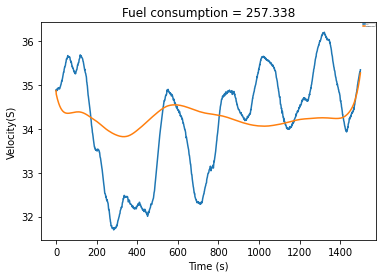

In [9]:
## Convex Objective 
i = 1
exp_name = "convex_ADAAGD_{}".format(i)
model = OptimalControlConvex(data[i]["time"], data[i]["y0"][0], data[i]["y0"][1], data[i]["xl"], data[i]["vl"])
A, b = model.constraints()
sol_4_1_con = ADAAGD_plus(model, max_iterations=100, epsilon=epsilon, x0=data[i]["u0"], A = A.T, b = b, R = 10)


out_file = open("results/{}.json".format(exp_name), "w") 
json.dump(sol_4_1_con, out_file, indent = 6) 
out_file.close() 

model_org = OptimalControl(data[i]["time"], data[i]["y0"][0], data[i]["y0"][1], data[i]["xl"], data[i]["vl"])
plt.plot(data[i]["vl"])
X, V = model.system_solve(sol_4_1_con["solution"])
fc = model_org.F(np.array(sol_4_1_con["solution"]))
plt.plot(V)
plt.legend(["Leader", "Optimal follower"], fontsize = 1)
plt.xlabel("Time (s)")
plt.ylabel("Velocity(S)")
plt.title("Fuel consumption = {}".format(np.round(fc, 3)))
plt.savefig("results/{}.png".format(exp_name), dpi = 300)

## Plotting

In [8]:
files = glob.glob("results/*.json")
figure = plt.figure()
for i, file in enumerate(files): 
    with open("myfile.json") as json_file:
        res = json.load(json_file)
        plt.plot(res["f"])
        
        
        
